# Introduction to Pandas

In [72]:
# !pip3 install pandas

In [73]:
import numpy as np
import pandas as pd

### The Pandas Objects

1. **Series**: 1D array of indexed data
2. **DataFrame**: 2D array of indexed data, which operates very similar as spreadsheet table.
3. **Index**: Property of Pandas series and dataframe object, which is immutable _ordered_ set

## The Pandas Series

In [74]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [75]:
# index object of the series "data"
data.index

RangeIndex(start=0, stop=4, step=1)

In [76]:
# get all values in the series as ndarray
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [77]:
list(data.items())

[(0, 0.25), (1, 0.5), (2, 0.75), (3, 1.0)]

### Indexing, Slicing

In [78]:
# Series works pretty much very similar to that of 1D ndarray
print("data[1]:",data[1])
print("data[1:3]:\n", data[1:3])

data[1]: 0.5
data[1:3]:
 1    0.50
2    0.75
dtype: float64


In [79]:
# To check whether the index exists in the series
print("Does index == 4 exists?", 4 in data)
print("Does index == 3 exists?", 3 in data)
print("Does 1.25 exists in values?", 1.25 in data.values)
print("Does 0.25 exists in values?", 0.25 in data.values)

Does index == 4 exists? False
Does index == 3 exists? True
Does 1.25 exists in values? False
Does 0.25 exists in values? True


### Customizing the Index Object of Series

In [80]:
# index object of the series needs not to be numeric
inning_data = pd.Series([0,0,3,4], index=['Inning 1', 'Inning 2', 'Inning 3', 'Inning 4'])
inning_data

Inning 1    0
Inning 2    0
Inning 3    3
Inning 4    4
dtype: int64

In [81]:
inning_data.index

Index(['Inning 1', 'Inning 2', 'Inning 3', 'Inning 4'], dtype='object')

### Creating Series from Dictionary

In [82]:
fruits = {
  0: "Apple",
  1: "Banana",
  2: "Kiwi",
  3: "Watermelon"
}
fruits_sr = pd.Series(fruits)
fruits_sr

0         Apple
1        Banana
2          Kiwi
3    Watermelon
dtype: object

In [83]:
groceries = {
  "f1": "Apple",
  "f2": "Banana",
  "f3": "Kiwi",
  "f4": "Watermelon",
  "v1": "Cabbage",
  "v2": "Carrot",
  "v3": "Mushroom"
}

groceries_keys = list(groceries.keys())
fruit_keys = [k for k in groceries_keys if k.startswith("f")]
fruit_keys

groceries_sr_fruit = pd.Series(groceries, index=fruit_keys)

In [84]:
groceries_sr_fruit

f1         Apple
f2        Banana
f3          Kiwi
f4    Watermelon
dtype: object

In [85]:
veg_keys= [k for k in groceries_keys if k.startswith("v")]
groceries_sr_veg = pd.Series(groceries, index=veg_keys)

In [86]:
groceries_sr_veg

v1     Cabbage
v2      Carrot
v3    Mushroom
dtype: object

## The Pandas DataFrame Object

In [87]:
student_score_dict = {"John": 90, "Sam": 82, "Alice": 95, "Bob": 73, "Cathy": 59}
student_class_dict = {"John": "A", "Sam": "A", "Alice": "B", "Bob": "C", "Cathy": "C"}

In [88]:
student_score_sr = pd.Series(student_score_dict)
student_score_sr

John     90
Sam      82
Alice    95
Bob      73
Cathy    59
dtype: int64

In [89]:
student_class_sr = pd.Series(student_class_dict)
student_class_sr

John     A
Sam      A
Alice    B
Bob      C
Cathy    C
dtype: object

### Creating DataFrame from Multiple Series

In [90]:
students_df = pd.DataFrame({"class": student_class_sr, "score": student_score_sr})
students_df

,class,score
John,A,90
Sam,A,82
Alice,B,95
Bob,C,73
Cathy,C,59


### Indexing

In [91]:
# Indexing by column name
class_data = students_df["class"]
class_data

John     A
Sam      A
Alice    B
Bob      C
Cathy    C
Name: class, dtype: object

In [92]:
# Indexing by index using loc (location) (i.e. student name in this example)
john_data = students_df.loc["John"]
john_data

class     A
score    90
Name: John, dtype: object

In [93]:
print("John's Class:", john_data["class"])
print("John's Score:", john_data["score"])

John's Class: A
John's Score: 90


In [94]:
# Indexing by order of index using iloc (index location) (nth student)
second_data = students_df.iloc[1]
second_data

class     A
score    82
Name: Sam, dtype: object

### Practice: Analyzing Data with Pandas out of .csv File

`.csv`?
- `C`oma `S`eparated `V`alues

In [95]:
state_area_df = pd.read_csv("../data/pdsh/state-areas.csv")
# index: 0~51
# column: ["state", "area (sq. mi)"]
state_area_df

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707
5,Colorado,104100
6,Connecticut,5544
7,Delaware,1954
8,Florida,65758
9,Georgia,59441


### How to find the Area of Wisconsin?

`Method 1`: Stupid Way!

In [96]:
state_list = state_area_df["state"].values.tolist()
state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'District of Columbia',
 'Puerto Rico']

In [97]:
# get index of wisconsin
wisconsin_index = state_list.index("Wisconsin")
print("The index of Wisconsin in the DataFrame is:", wisconsin_index)

The index of Wisconsin in the DataFrame is: 48


In [98]:
# finally, get the area of Wisconsin
print("The area of Wisconsin is:", state_area_df.loc[wisconsin_index].loc["area (sq. mi)"])

The area of Wisconsin is: 65503


`Method 2`: Using Series

In [99]:
state_area_df = pd.read_csv("../data/pdsh/state-areas.csv")

In [100]:
# get states and area as separate array
states_arr = state_area_df["state"].values
area_arr = state_area_df["area (sq. mi)"].values

In [101]:
state_area_sr = pd.Series(area_arr, index=states_arr)
state_area_sr

Alabama                  52423
Alaska                  656425
Arizona                 114006
Arkansas                 53182
California              163707
Colorado                104100
Connecticut               5544
Delaware                  1954
Florida                  65758
Georgia                  59441
Hawaii                   10932
Idaho                    83574
Illinois                 57918
Indiana                  36420
Iowa                     56276
Kansas                   82282
Kentucky                 40411
Louisiana                51843
Maine                    35387
Maryland                 12407
Massachusetts            10555
Michigan                 96810
Minnesota                86943
Mississippi              48434
Missouri                 69709
Montana                 147046
Nebraska                 77358
Nevada                  110567
New Hampshire             9351
New Jersey                8722
New Mexico              121593
New York                 54475
North Ca

In [102]:
print("The area of Wisconsin is:", state_area_sr["Wisconsin"])

The area of Wisconsin is: 65503


`Method 3`: Using DataFrame

In [103]:
state_area_df = pd.read_csv("../data/state-areas.csv")
state_area_df

FileNotFoundError: [Errno 2] No such file or directory: '../data/state-areas.csv'

In [ ]:
# overwrite state_area_df with new DataFrame, where index is state, and values are area (sq. mi).
state_area_df_2 = pd.DataFrame({"area (sq. mi)": state_area_df["area (sq. mi)"].values}, index=state_area_df["state"])
state_area_df_2

,area (sq. mi)
state,
Alabama,52423
Alaska,656425
Arizona,114006
Arkansas,53182
California,163707
Colorado,104100
Connecticut,5544
Delaware,1954
Florida,65758


In [ ]:
print("The area of Wisconsin is:", state_area_df_2.loc["Wisconsin"].loc["area (sq. mi)"])

The area of Wisconsin is: 65503


`Method 4`: Taking full advantage of Pandas with `set_index` function of pandas DataFrame Object

In [ ]:
state_area_df = pd.read_csv("../data/pdsh/state-areas.csv")
state_area_df = state_area_df.set_index("state")
# index: ["state"]
# column: ["area (sq. mi)"]
state_area_df

,area (sq. mi)
state,
Alabama,52423
Alaska,656425
Arizona,114006
Arkansas,53182
California,163707
Colorado,104100
Connecticut,5544
Delaware,1954
Florida,65758


In [ ]:
print("The area of Wisconsin is:", state_area_df.loc["Wisconsin"].loc["area (sq. mi)"])

The area of Wisconsin is: 65503


In [ ]:
# Create a series where:
# - index: number from 0 onwards
# - value column name: pop, values: [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]

pop = [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]

pop_sr = pd.Series(pop)
print(pop_sr)


0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
dtype: float64


In [ ]:
# similarly, create:
# - year series: [2000, 2001, 2002, 2001, 2002, 2003]
# - state series: ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada']

# Then create a dataframe that contains three columns, pop, year, and state

year = [2000, 2001, 2002, 2001, 2002, 2003]
state = ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada']

year_sr = pd.Series(year)
state_sr = pd.Series(state)

df = pd.DataFrame({"year": year_sr, "state": state_sr, "pop": pop_sr})
df


,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [ ]:
# 1. reorder column
df = pd.DataFrame(df, columns=['pop', 'year', 'state'])
df

,pop,year,state
0,1.5,2000,Ohio
1,1.7,2001,Ohio
2,3.6,2002,Ohio
3,2.4,2001,Nevada
4,2.9,2002,Nevada
5,3.2,2003,Nevada


In [ ]:
# add one more column (method 1)
df['debt'] = 16.5 # this will create a new column called "debt", with all values being 16.5
df

,pop,year,state,debt
0,1.5,2000,Ohio,16.5
1,1.7,2001,Ohio,16.5
2,3.6,2002,Ohio,16.5
3,2.4,2001,Nevada,16.5
4,2.9,2002,Nevada,16.5
5,3.2,2003,Nevada,16.5


In [ ]:
# add one more column (method 2)
eastern = [True, True, True, False, False, False]
df['eastern'] = pd.Series(eastern)
df

,pop,year,state,debt,eastern
0,1.5,2000,Ohio,16.5,True
1,1.7,2001,Ohio,16.5,True
2,3.6,2002,Ohio,16.5,True
3,2.4,2001,Nevada,16.5,False
4,2.9,2002,Nevada,16.5,False
5,3.2,2003,Nevada,16.5,False


In [ ]:
# add one more column (method 3)
states_western = ['Wisconsin', 'Nevada']
df['western'] = df['state'].isin(states_western) # as long as the RHS is series
df

,pop,year,state,debt,eastern,western
0,1.5,2000,Ohio,16.5,True,False
1,1.7,2001,Ohio,16.5,True,False
2,3.6,2002,Ohio,16.5,True,False
3,2.4,2001,Nevada,16.5,False,True
4,2.9,2002,Nevada,16.5,False,True
5,3.2,2003,Nevada,16.5,False,True


### Practicing Pandas with Baseball data

In [ ]:
player_data = pd.read_csv("../data/ltcwbb/2018-season/players.csv")
player_data

,name,bats,throws,height,weight,playerID,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry,debut
0,Jose Abreu,R,R,75.0,255.0,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba,20140331
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela,20180425
2,Willy Adames,R,R,72.0,200.0,adamewi01,1995,9,2,Santiago,Santiago,D.R.,20180522
3,Matt Adams,L,R,75.0,245.0,adamsma01,1988,8,31,Philipsburg,PA,USA,20120520
4,Jim Adduci,L,L,74.0,210.0,adducji02,1985,5,15,Burnaby,BC,CAN,20130901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,1988,8,13,Arlington,TX,USA,20130710
821,Mike Wright,R,R,78.0,215.0,wrighmi01,1990,1,3,Bennettsville,SC,USA,20150517
822,Steven Wright,R,R,74.0,215.0,wrighst01,1984,8,30,Torrance,CA,USA,20130423
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,1991,12,31,Lakeland,FL,USA,20180331


To check the number of rows and columns in the dataframe `(recall NumPy)`,

In [ ]:
player_data.shape

(825, 13)

To `briefly` check what's in the dataframe:

In [ ]:
# returns the first 5 rows of the data frame
player_data.head()

,name,bats,throws,height,weight,playerID,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry,debut
0,Jose Abreu,R,R,75.0,255.0,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba,20140331
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela,20180425
2,Willy Adames,R,R,72.0,200.0,adamewi01,1995,9,2,Santiago,Santiago,D.R.,20180522
3,Matt Adams,L,R,75.0,245.0,adamsma01,1988,8,31,Philipsburg,PA,USA,20120520
4,Jim Adduci,L,L,74.0,210.0,adducji02,1985,5,15,Burnaby,BC,CAN,20130901


To get all columns in the data:

In [ ]:
player_data.columns

Index(['name', 'bats', 'throws', 'height', 'weight', 'playerID', 'birthYear',
       'birthMonth', 'birthDay', 'birthCity', 'birthState', 'birthCountry',
       'debut'],
      dtype='object')

To filter out columns that's related to the player's personal information:

In [ ]:
columns = ["name", "playerID","birthYear",	"birthMonth",	"birthDay",	"birthCity",	"birthState",	"birthCountry"]
player_data_personal = player_data[columns].head()
player_data_personal

,name,playerID,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry
0,Jose Abreu,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba
1,Ronald Acuna,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela
2,Willy Adames,adamewi01,1995,9,2,Santiago,Santiago,D.R.
3,Matt Adams,adamsma01,1988,8,31,Philipsburg,PA,USA
4,Jim Adduci,adducji02,1985,5,15,Burnaby,BC,CAN


In [ ]:
# to set the name column as index (generated new dataframe)
player_data_personal.set_index("name")

,playerID,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry
name,,,,,,,
Jose Abreu,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba
Ronald Acuna,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela
Willy Adames,adamewi01,1995,9,2,Santiago,Santiago,D.R.
Matt Adams,adamsma01,1988,8,31,Philipsburg,PA,USA
Jim Adduci,adducji02,1985,5,15,Burnaby,BC,CAN


In [ ]:
# to set the playerID column as index (generated new dataframe)
player_data_personal.set_index("playerID")

,name,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry
playerID,,,,,,,
abreujo02,Jose Abreu,1987,1,29,Cienfuegos,Cienfuegos,Cuba
acunaro01,Ronald Acuna,1997,12,18,La Guaira,Vargas,Venezuela
adamewi01,Willy Adames,1995,9,2,Santiago,Santiago,D.R.
adamsma01,Matt Adams,1988,8,31,Philipsburg,PA,USA
adducji02,Jim Adduci,1985,5,15,Burnaby,BC,CAN


In [ ]:
# to override the dataframe in the player_data_personal,
player_data_personal = player_data_personal.set_index("playerID")
player_data_personal

,name,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry
playerID,,,,,,,
abreujo02,Jose Abreu,1987,1,29,Cienfuegos,Cienfuegos,Cuba
acunaro01,Ronald Acuna,1997,12,18,La Guaira,Vargas,Venezuela
adamewi01,Willy Adames,1995,9,2,Santiago,Santiago,D.R.
adamsma01,Matt Adams,1988,8,31,Philipsburg,PA,USA
adducji02,Jim Adduci,1985,5,15,Burnaby,BC,CAN


In [ ]:
# or we could use "inplace" attribute
player_data_personal.set_index("name")
player_data_personal # index column will still stay as playerID

,name,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry
playerID,,,,,,,
abreujo02,Jose Abreu,1987,1,29,Cienfuegos,Cienfuegos,Cuba
acunaro01,Ronald Acuna,1997,12,18,La Guaira,Vargas,Venezuela
adamewi01,Willy Adames,1995,9,2,Santiago,Santiago,D.R.
adamsma01,Matt Adams,1988,8,31,Philipsburg,PA,USA
adducji02,Jim Adduci,1985,5,15,Burnaby,BC,CAN


In [ ]:
# or we could use "inplace" attribute
player_data_personal.set_index("name", inplace=True)
player_data_personal # index column will become name column

,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry
name,,,,,,
Jose Abreu,1987,1,29,Cienfuegos,Cienfuegos,Cuba
Ronald Acuna,1997,12,18,La Guaira,Vargas,Venezuela
Willy Adames,1995,9,2,Santiago,Santiago,D.R.
Matt Adams,1988,8,31,Philipsburg,PA,USA
Jim Adduci,1985,5,15,Burnaby,BC,CAN


In [ ]:
# to bring back "playerID" column,
player_data_personal['playerID'] = player_data["playerID"]
player_data_personal # all data in playerID Column becomes NaN (Not a Number). Why?

,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry,playerID
name,,,,,,,
Jose Abreu,1987,1,29,Cienfuegos,Cienfuegos,Cuba,NaN
Ronald Acuna,1997,12,18,La Guaira,Vargas,Venezuela,NaN
Willy Adames,1995,9,2,Santiago,Santiago,D.R.,NaN
Matt Adams,1988,8,31,Philipsburg,PA,USA,NaN
Jim Adduci,1985,5,15,Burnaby,BC,CAN,NaN


The reason why the playerID column added to `player_data_personal` is because the indexes of `player_data` and `player_data_person` are different.

In [ ]:
player_data_personal # index column is "name"

,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry,playerID
name,,,,,,,
Jose Abreu,1987,1,29,Cienfuegos,Cienfuegos,Cuba,NaN
Ronald Acuna,1997,12,18,La Guaira,Vargas,Venezuela,NaN
Willy Adames,1995,9,2,Santiago,Santiago,D.R.,NaN
Matt Adams,1988,8,31,Philipsburg,PA,USA,NaN
Jim Adduci,1985,5,15,Burnaby,BC,CAN,NaN


In [ ]:
player_data # index column is unset

,name,bats,throws,height,weight,playerID,birthYear,birthMonth,birthDay,birthCity,birthState,birthCountry,debut
0,Jose Abreu,R,R,75.0,255.0,abreujo02,1987,1,29,Cienfuegos,Cienfuegos,Cuba,20140331
1,Ronald Acuna,R,R,72.0,180.0,acunaro01,1997,12,18,La Guaira,Vargas,Venezuela,20180425
2,Willy Adames,R,R,72.0,200.0,adamewi01,1995,9,2,Santiago,Santiago,D.R.,20180522
3,Matt Adams,L,R,75.0,245.0,adamsma01,1988,8,31,Philipsburg,PA,USA,20120520
4,Jim Adduci,L,L,74.0,210.0,adducji02,1985,5,15,Burnaby,BC,CAN,20130901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Brandon Workman,R,R,77.0,235.0,workmbr01,1988,8,13,Arlington,TX,USA,20130710
821,Mike Wright,R,R,78.0,215.0,wrighmi01,1990,1,3,Bennettsville,SC,USA,20150517
822,Steven Wright,R,R,74.0,215.0,wrighst01,1984,8,30,Torrance,CA,USA,20130423
823,Ryan Yarbrough,R,L,77.0,205.0,yarbrry01,1991,12,31,Lakeland,FL,USA,20180331


In [ ]:
# Solution: set index of the player_data without inplace, to "name"
player_data_personal['playerID'] = player_data.set_index("name")["playerID"]
player_data_personal

NameError: name 'player_data' is not defined

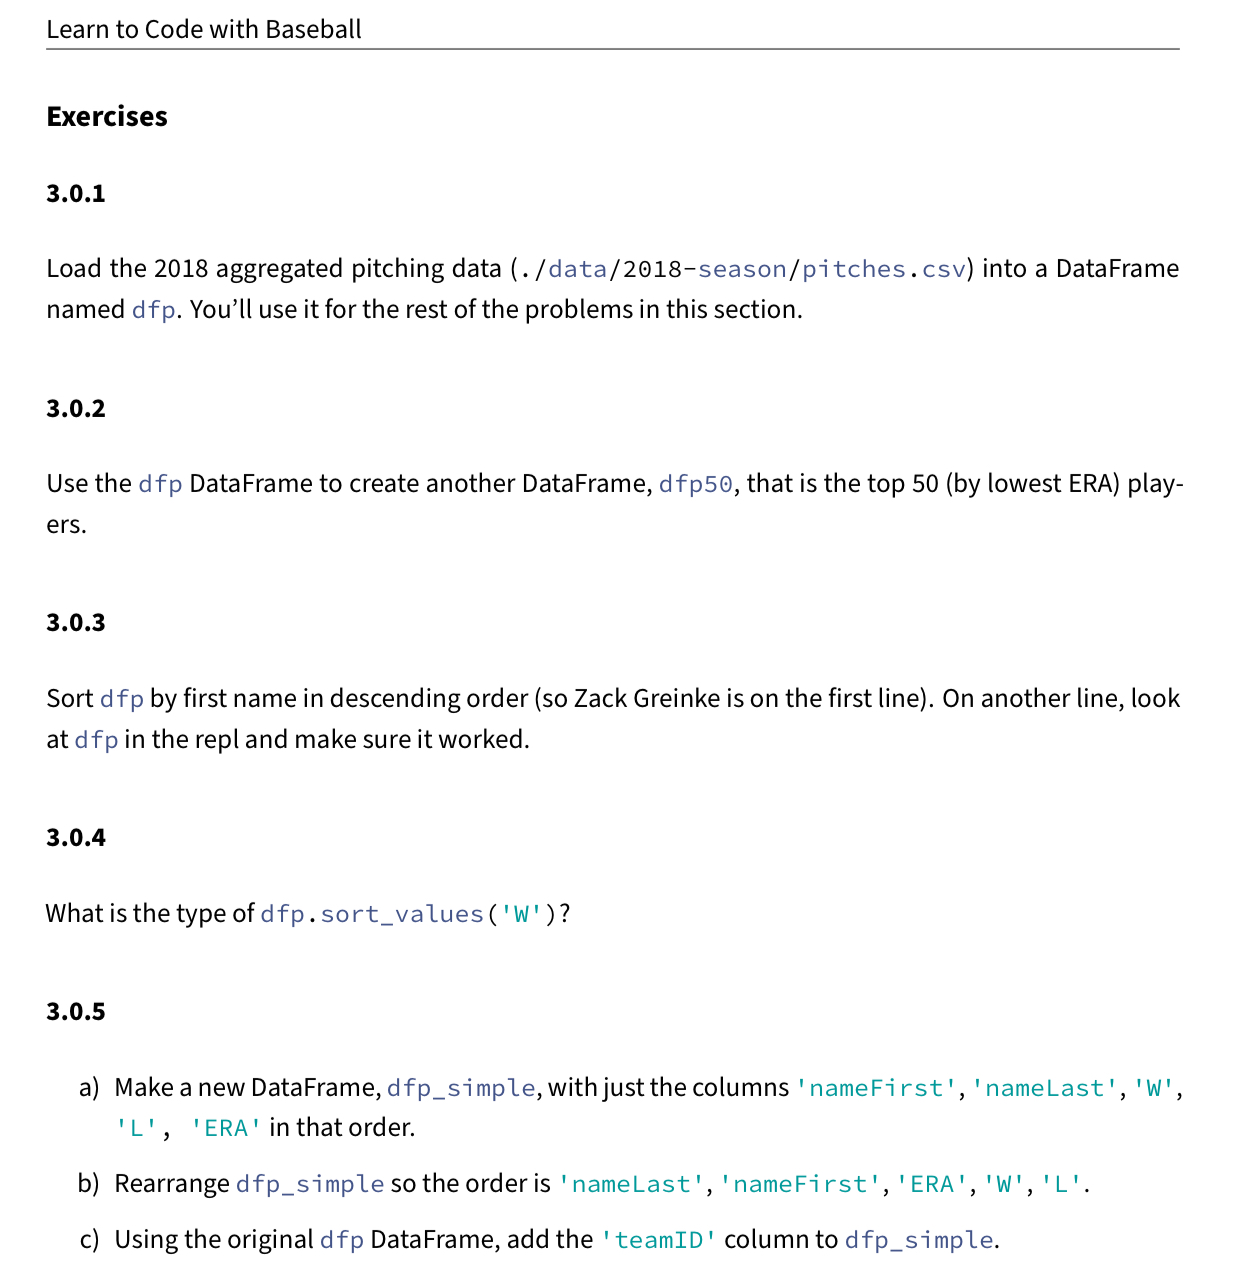

In [121]:
dfp = pd.read_csv("../data/ltcwbb/2018-season/pitches.csv")
dfp1 = dfp.sort_values(by='nameFirst')
dfp1

,nameFirst,nameLast,yearID,stint,teamID,lgID,W,L,G,GS,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,playerID
284,A. J.,Minter,2018,1,ATL,NL,4,3,65,0,...,5,2.0,0,260.0,31,23,1.0,1.0,3.0,minteaj01
88,A. J.,Cole,2018,2,NYA,AL,3,1,28,0,...,2,0.0,0,168.0,13,23,0.0,1.0,2.0,coleaj01
334,AJ,Ramos,2018,1,NYN,NL,2,2,28,0,...,1,0.0,0,88.0,5,14,0.0,1.0,2.0,ramosaj01
56,Aaron,Bummer,2018,1,CHA,AL,0,1,37,0,...,7,1.0,1,144.0,9,19,0.0,0.0,5.0,bummeaa01
299,Aaron,Nola,2018,1,PHI,NL,17,6,33,33,...,4,7.0,1,831.0,0,57,6.0,4.0,16.0,nolaaa01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Zach,Eflin,2018,1,PHI,NL,11,8,24,24,...,4,3.0,0,548.0,0,69,5.0,4.0,5.0,eflinza01
115,Zach,Duke,2018,2,SEA,AL,2,1,27,0,...,0,1.0,0,62.0,3,9,1.0,0.0,2.0,dukeza01
114,Zach,Duke,2018,1,MIN,AL,3,4,45,0,...,3,5.0,0,178.0,8,19,1.0,1.0,2.0,dukeza01
161,Zack,Godley,2018,1,ARI,NL,15,11,33,32,...,17,12.0,1,791.0,0,103,8.0,8.0,14.0,godleza01


In [110]:
dfp50 = dfp.head(50)
print(dfp50)


   nameFirst     nameLast  yearID  stint teamID lgID   W   L   G  GS  ...  WP  \
0      Jason         Adam    2018      1    KCA   AL   0   3  31   0  ...   4   
1       Matt       Albers    2018      1    MIL   NL   3   3  34   0  ...   1   
2     Victor    Alcantara    2018      1    DET   AL   1   1  27   0  ...   2   
3      Scott    Alexander    2018      1    LAN   NL   2   1  73   1  ...   2   
4       Cody        Allen    2018      1    CLE   AL   4   6  70   0  ...   3   
5        Dan    Altavilla    2018      1    SEA   AL   3   2  22   0  ...   4   
6       Jose      Alvarez    2018      1    LAA   AL   6   4  76   0  ...   1   
7       Jose     Alvarado    2018      1    TBA   AL   1   6  70   0  ...   2   
8      Chase     Anderson    2018      1    MIL   NL   9   8  30  30  ...   1   
9     Justin     Anderson    2018      1    LAA   AL   3   3  57   0  ...   9   
10     Tyler     Anderson    2018      1    COL   NL   7   9  32  32  ...   9   
11      Matt     Andriese   

In [119]:
type(dfp)

pandas.core.frame.DataFrame

In [135]:
columns = ["nameFirst", "nameLast",	"W",	"L", "ERA", "teamID"]
dfp_simple = dfp[columns].head()

dfp_simple = pd.DataFrame(dfp_simple, columns=['NameLast', 'NameFirst', 'ERA', 'W', 'L', 'teamID'])
dfp_simple

,NameLast,NameFirst,ERA,W,L,teamID
0,NaN,NaN,6.12,0,3,KCA
1,NaN,NaN,7.34,3,3,MIL
2,NaN,NaN,2.40,1,1,DET
3,NaN,NaN,3.68,2,1,LAN
4,NaN,NaN,4.70,4,6,CLE
